# Deep learning

![](https://i.redd.it/ro7j9zngfh2z.png)

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import keras.datasets

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

Using TensorFlow backend.


In [3]:
# Data loading
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalization and one-hot
X_train, X_test = X_train/255, X_test/255
y_train, y_test = keras.utils.to_categorical(y_train, 10), keras.utils.to_categorical(y_test, 10)
input_size = X_train[0].shape

4423680/4422102 [==============================] - 0s 0us/step


The shape of the input is (28, 28)


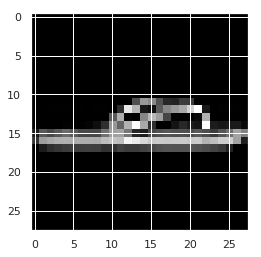

In [8]:
print('The shape of the input is', input_size)
plt.imshow(X_train[np.random.randint(1000)], cmap='gray')
plt.show()

In [0]:
# Simplest model definition
model = Sequential()

model.add(Flatten(input_shape = input_size))
model.add(Dense(units=128, input_shape = input_size))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_history = model.fit(X_train, y_train, epochs=5, batch_size=256)

W0904 16:57:04.273927 140671984314240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0904 16:57:04.308849 140671984314240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.

W0904 16:57:04.454375 140671984314240 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0904 16:57:04.512177 140671984314240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecate

Epoch 1/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.6114 - acc: 0.7937
Epoch 2/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.4266 - acc: 0.8515
Epoch 3/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.3818 - acc: 0.8655
Epoch 4/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.3570 - acc: 0.8745
Epoch 5/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.3355 - acc: 0.8807


In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Loss and accuracy
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 62us/step


[0.3904802168369293, 0.8602]

The shape of the input is (28, 28)


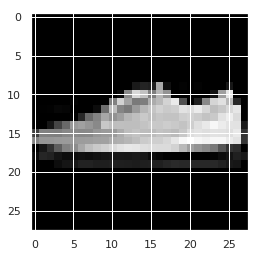

Working with sgd
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 66us/step - loss: 0.9254 - acc: 0.7084 - val_loss: 0.6371 - val_acc: 0.7868
Epoch 2/15
60000/60000 [==============================] - 3s 51us/step - loss: 0.5640 - acc: 0.8102 - val_loss: 0.5614 - val_acc: 0.7994
Epoch 3/15
60000/60000 [==============================] - 3s 53us/step - loss: 0.4999 - acc: 0.8277 - val_loss: 0.5290 - val_acc: 0.8136
Epoch 4/15
60000/60000 [==============================] - 3s 52us/step - loss: 0.4662 - acc: 0.8382 - val_loss: 0.4814 - val_acc: 0.8303
Epoch 5/15
60000/60000 [==============================] - 3s 53us/step - loss: 0.4445 - acc: 0.8444 - val_loss: 0.5325 - val_acc: 0.7975
Epoch 6/15
60000/60000 [==============================] - 3s 53us/step - loss: 0.4301 - acc: 0.8491 - val_loss: 0.4475 - val_acc: 0.8401
Epoch 7/15
60000/60000 [==============================] - 3s 52us/step - loss: 0.4158 - acc: 0.8555 - val_loss:

In [0]:
# Different optimizers comparison
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam', 'nadam']

# Data loading
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalization and one-hot
X_train, X_test = X_train/255, X_test/255
y_train, y_test = keras.utils.to_categorical(y_train, 10), keras.utils.to_categorical(y_test, 10)
input_size = X_train[0].shape

print('The shape of the input is', input_size)
plt.imshow(X_train[np.random.randint(1000)], cmap='gray')
plt.show()

histories = []
for optimizer in optimizers:
    print('Working with {}'.format(optimizer))
    # Simplest model definition
    model = Sequential()

    model.add(Flatten(input_shape = input_size))
    model.add(Dense(units=128))
    model.add(Activation('relu'))
    model.add(Dense(units=32))
    model.add(Activation('relu'))
    model.add(Dense(units=10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

    # Тренировка с указанием данных, числа эпох и размера подвыборки
    model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=64)
    histories.append(model_history)

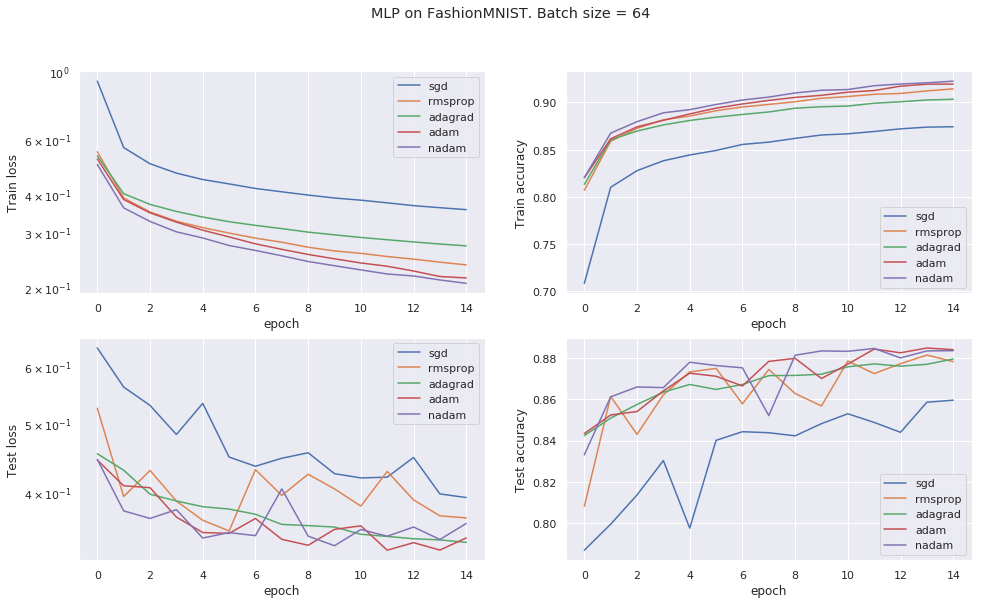

In [0]:
fig = plt.figure(figsize = (16,9))
fig.suptitle('MLP on FashionMNIST. Batch size = 64')
plt.subplot(2, 2, 1)
for history, optimizer in zip(histories, optimizers):
    plt.xlabel('epoch')
    plt.ylabel('Train loss')
    plt.semilogy(history.history['loss'], label = optimizer)
    plt.legend()

plt.subplot(2, 2, 2)
for history, optimizer in zip(histories, optimizers):
    plt.xlabel('epoch')
    plt.ylabel('Train accuracy')
    plt.plot(history.history['acc'], label = optimizer)
    plt.legend()

plt.subplot(2, 2, 3)
for history, optimizer in zip(histories, optimizers):
    plt.xlabel('epoch')
    plt.ylabel('Test loss')
    plt.semilogy(history.history['val_loss'], label = optimizer)
    plt.legend()

plt.subplot(2, 2, 4)
for history, optimizer in zip(histories, optimizers):
    plt.xlabel('epoch')
    plt.ylabel('Test accuracy')
    plt.plot(history.history['val_acc'], label = optimizer)
    plt.legend()

plt.savefig('MLP_optims.svg')
plt.show()